In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pacmap
import umap
from sklearn.manifold import TSNE, SpectralEmbedding

In [4]:
# Simulate the data using the description in the paper
# 50 dimensions, 20 groups simulated by gaussians
# each group will have 200 samples, leads to a total of 4000
# the groups are all aligned on the 25th dim
r = np.random.default_rng()
samples = np.zeros((4000, 50))
labels = np.zeros((4000,))
for i in range(20):
    mean = np.ones((50,))
    mean[25] = 10*i
    cov = np.diagflat(np.ones((50,)))
    sample = r.multivariate_normal(mean, cov, size=(200,))
    samples[i*200: i*200+200] = sample
    labels[i*200: i*200+200] = i * np.ones((200,))

In [5]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from fa2 import ForceAtlas2 as FA2
def transform_by_FA2(X, n_neighbors=15):
    if X.shape[1] > 100:
        p = PCA(n_components=100)
        X = p.fit_transform(X)

    n = NearestNeighbors(n_neighbors=n_neighbors)
    n.fit(X)
    
    # Construct the graph
    A = n.kneighbors_graph(X)
    # A = A.toarray()
    A += A.T
    A = (A > 0).astype(int)

    # Initialize the graph.
    # Rescale to match FA2 requirements

    p = PCA(n_components=2)
    X = p.fit_transform(X)
    X_init = X[:, :2]
    X_init *= 10000/np.std(X_init)

    f = FA2()
    X_low = f.forceatlas2(A, X_init, 750)
    X_low = np.array(X_low)
    return X_low



In [8]:
from openTSNE import TSNE as fitsne
import trimap
# use different DR method to fit over the data
p = pacmap.PaCMAP()
u = umap.UMAP()
t30 = fitsne(perplexity=30)
L = SpectralEmbedding()
t = trimap.TRIMAP()

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, lr=1000.0, n_iters=400, weight_adj=500.0, fast_trimap = True, opt_method = dbd, verbose=True, return_seq=False)


In [9]:
X_p = p.fit_transform(samples)
X_u = u.fit_transform(samples)
X_t30 = t30.fit(samples)
X_l = L.fit_transform(samples)
X_f = transform_by_FA2(samples)
X_t = t.fit_transform(samples)

/Users/hyhuang/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 17 separate connected components using meta-embedding (experimental)
  n_components
100%|██████████| 750/750 [00:49<00:00, 15.30it/s]


BarnesHut Approximation  took  13.80  seconds
Repulsion forces  took  33.28  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  0.33  seconds
AdjustSpeedAndApplyForces step  took  0.60  seconds
running TriMap on 4000 points with dimension 50
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 92.683, Violated triplets: 0.0421
Iteration:  200, Loss: 91.750, Violated triplets: 0.0417
Iteration:  300, Loss: 91.315, Violated triplets: 0.0415
Iteration:  400, Loss: 90.860, Violated triplets: 0.0413
Elapsed time: 0:00:04.737235


Text(0.5, 1, 'TriMap')

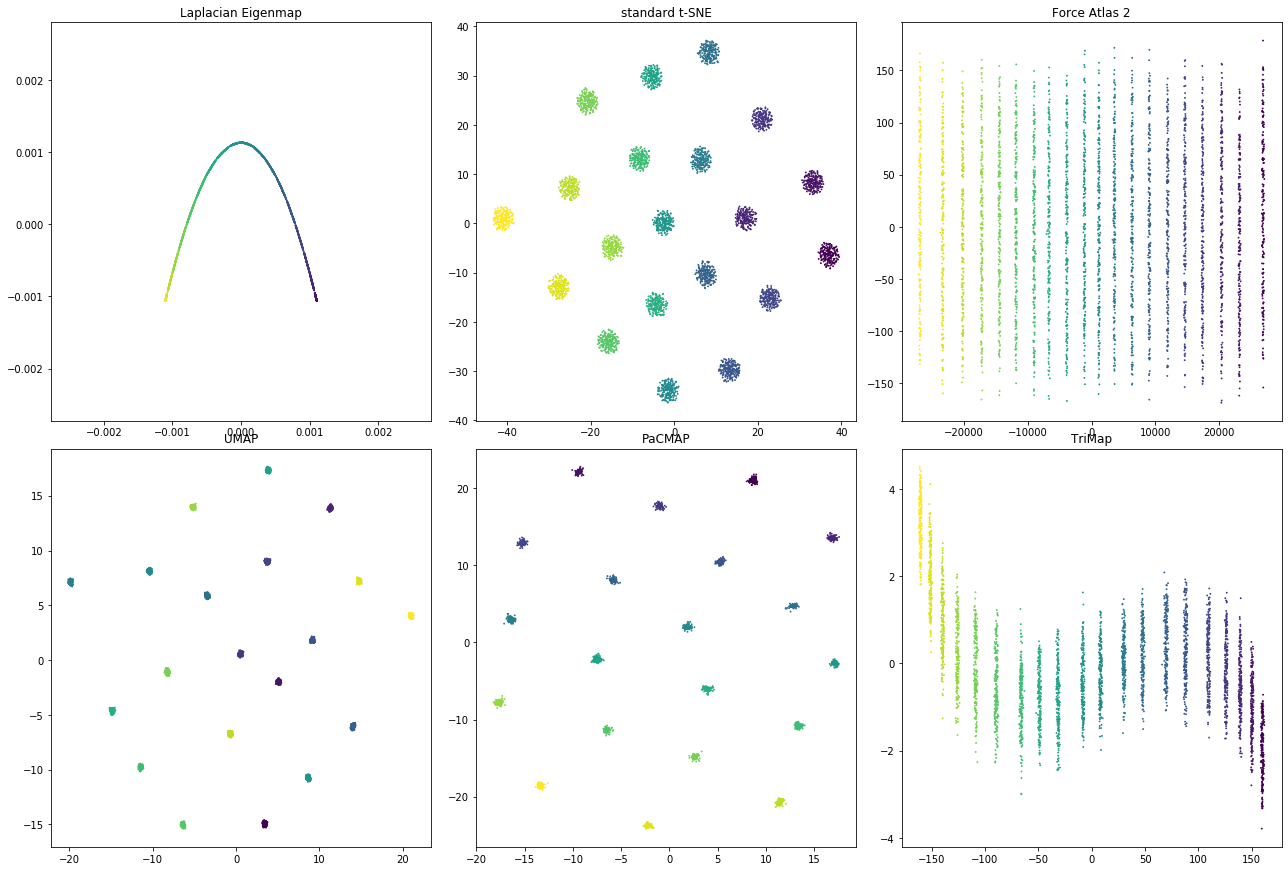

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
X = [X_l, X_t30, X_f, X_u, X_p, X_t]
axes = axes.flatten()
for i in range(6):
    axes[i].scatter(X[i][:, 0], X[i][:, 1], c=labels, cmap='viridis', s=0.7)
plt.tight_layout()

axes[0].set_title('Laplacian Eigenmap')
axes[1].set_title('standard t-SNE')
axes[2].set_title('Force Atlas 2')
axes[3].set_title('UMAP')
axes[4].set_title('PaCMAP')
axes[5].set_title('TriMap')

This dataset is the same as the experiment in Figure 2 of 2007.08902. 20 isotropic 50-dimensional Gaussians, equally spaced along one axis, such that only few inter-cluster edges exist in the kNN graph. PaCMAP behaves similarly to UMAP. I failed to replicate the result for ForceAtlas2. 

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, lr=1000.0, n_iters=400, weight_adj=500.0, fast_trimap = True, opt_method = dbd, verbose=True, return_seq=False)


100%|██████████| 750/750 [00:50<00:00, 14.96it/s]


BarnesHut Approximation  took  12.77  seconds
Repulsion forces  took  35.75  seconds
Gravitational forces  took  0.12  seconds
Attraction forces  took  0.28  seconds
AdjustSpeedAndApplyForces step  took  0.49  seconds
running TriMap on 4000 points with dimension 50
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 105.971, Violated triplets: 0.0482
Iteration:  200, Loss: 103.837, Violated triplets: 0.0472
Iteration:  300, Loss: 103.020, Violated triplets: 0.0468
Iteration:  400, Loss: 102.153, Violated triplets: 0.0464
Elapsed time: 0:00:03.463545


Text(0.5, 1, 'TriMap')

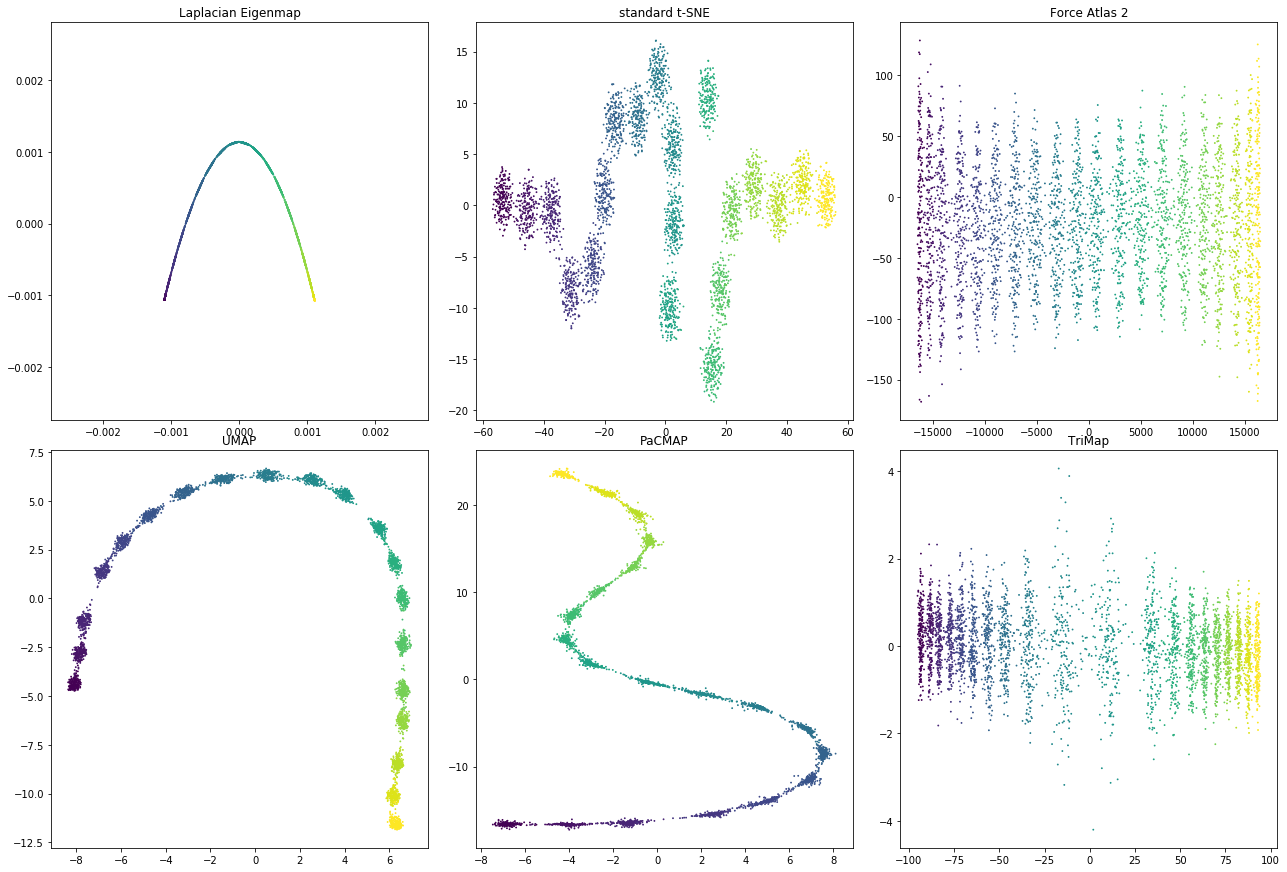

In [11]:
# Simulate the data using the description in the paper
# 50 dimensions, 20 groups simulated by gaussians
# each group will have 200 samples, leads to a total of 4000
# the groups are all aligned on the 25th dim
r = np.random.default_rng()
samples = np.zeros((4000, 50))
labels = np.zeros((4000,))
for i in range(20):
    mean = np.ones((50,))
    mean[25] = 5*i
    cov = np.diagflat(np.ones((50,)))
    sample = r.multivariate_normal(mean, cov, size=(200,))
    samples[i*200: i*200+200] = sample
    labels[i*200: i*200+200] = i * np.ones((200,))
# use different DR method to fit over the data
p = pacmap.PaCMAP()
u = umap.UMAP()
t30 = fitsne(perplexity=30)
L = SpectralEmbedding()
t = trimap.TRIMAP()
X_p = p.fit_transform(samples)
X_u = u.fit_transform(samples)
X_t30 = t30.fit(samples)
X_l = L.fit_transform(samples)
X_f = transform_by_FA2(samples)
X_t = t.fit_transform(samples)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
X = [X_l, X_t30, X_f, X_u, X_p, X_t]
axes = axes.flatten()
for i in range(6):
    axes[i].scatter(X[i][:, 0], X[i][:, 1], c=labels, cmap='viridis', s=0.7)
plt.tight_layout()

axes[0].set_title('Laplacian Eigenmap')
axes[1].set_title('standard t-SNE')
axes[2].set_title('Force Atlas 2')
axes[3].set_title('UMAP')
axes[4].set_title('PaCMAP')
axes[5].set_title('TriMap')

Same as above, but there's more overlap between each of the multinomial Gaussian. In this case PaCMAP demonstrates a stronger ability to preserve global structure than UMAP.